In [1]:
import os
import sys
import numpy as np
import pandas as pd
import pysubgroup as ps

In [2]:
sys.path.append(os.path.join(os.path.dirname(os.path.dirname(os.getcwd())),'sd-4sql\\packages'))
saved_path = os.path.join(os.path.dirname(os.path.dirname(os.path.dirname(os.getcwd()))),'Data\\saved-data\\')

In [3]:
from sd_analysis import *
from subgroup_discovery import *
from sd_postprocessing import *

In [4]:
import matplotlib.pyplot as plt
import matplotlib

In [5]:
import warnings
warnings.filterwarnings("ignore")

### Software Version = V15-2

In [6]:
queries = pd.read_csv(saved_path + 'dataset-d3.csv')

## Use cases 2 : Concurrency issues

In [7]:
queries['conc_disc'] = queries['concurrence'].apply(lambda x : 1 if x > 0.5 else 0)

#### Support

In [8]:
result_supp = sd_binary_conds (queries, dict_conds = {},_target = 'conc_disc', mesure  = 'Support',_depth  = 1,
                              threshold = 10000, result_size = 100, algorithm   = 'Beam Search', _beam_width = 100,
                              features_ignore = ['concurrence'])
res_supp = result_supp.to_dataframe()
res_supp[:10]

,quality,subgroup,size_sg,size_dataset,positives_sg,positives_dataset,size_complement,relative_size_sg,relative_size_complement,coverage_sg,coverage_complement,target_share_sg,target_share_complement,target_share_dataset,lift
0,1.0,SELECT_fr.infologic.edi.ramasseauto.modele.ser...,3030.0,3031.0,197.0,197.0,1.0,0.999670,0.000330,1.0,0.0,0.065017,0.0,0.064995,1.000330
1,1.0,SELECT_fr.infologic.global.commun.modele.blocn...,3005.0,3031.0,197.0,197.0,26.0,0.991422,0.008578,1.0,0.0,0.065557,0.0,0.064995,1.008652
2,1.0,SELECT_fr.infologic.global.outils.modele.table...,2737.0,3031.0,197.0,197.0,294.0,0.903002,0.096998,1.0,0.0,0.071977,0.0,0.064995,1.107417
3,1.0,SELECT_fr.infologic.global.commun.parametres.m...,3030.0,3031.0,197.0,197.0,1.0,0.999670,0.000330,1.0,0.0,0.065017,0.0,0.064995,1.000330
4,1.0,SELECT_fr.infologic.global.commun.modele.blocn...,3005.0,3031.0,197.0,197.0,26.0,0.991422,0.008578,1.0,0.0,0.065557,0.0,0.064995,1.008652
5,1.0,SELECT_fr.infologic.gpao.modele.interface.ik==0,3026.0,3031.0,197.0,197.0,5.0,0.998350,0.001650,1.0,0.0,0.065102,0.0,0.064995,1.001652
6,1.0,SELECT_fr.infologic.gpao.modele.of.nomenc.indi...,3024.0,3031.0,197.0,197.0,7.0,0.997691,0.002309,1.0,0.0,0.065146,0.0,0.064995,1.002315
7,1.0,SELECT_fr.infologic.gpao.modele.of.datfab==0,3024.0,3031.0,197.0,197.0,7.0,0.997691,0.002309,1.0,0.0,0.065146,0.0,0.064995,1.002315
8,1.0,SELECT_fr.infologic.global.outils.modele.menui...,3030.0,3031.0,197.0,197.0,1.0,0.999670,0.000330,1.0,0.0,0.065017,0.0,0.064995,1.000330
9,1.0,SELECT_fr.infologic.gpao.atelier.modele.machla...,3029.0,3031.0,197.0,197.0,2.0,0.999340,0.000660,1.0,0.0,0.065038,0.0,0.064995,1.000660


#### Lift

In [9]:
result_lift = sd_binary_conds (queries, dict_conds = {},_target = 'conc_disc', mesure  = 'Lift',_depth  = 1,
                              threshold = 10000, result_size = 100, algorithm   = 'Beam Search', _beam_width = 100,
                              features_ignore = ['concurrence'])
res_lift = result_lift.to_dataframe()
res_lift[:10]

,quality,subgroup,size_sg,size_dataset,positives_sg,positives_dataset,size_complement,relative_size_sg,relative_size_complement,coverage_sg,coverage_complement,target_share_sg,target_share_complement,target_share_dataset,lift
0,0.935005,WHERE_fr.infologic.superviseur.gestionco.model...,1.0,3031.0,1.0,197.0,3030.0,0.00033,0.99967,0.005076,0.994924,1.0,0.064665,0.064995,15.385787
1,0.935005,SELECT_fr.infologic.superviseur.gestionco.mode...,1.0,3031.0,1.0,197.0,3030.0,0.00033,0.99967,0.005076,0.994924,1.0,0.064665,0.064995,15.385787
2,0.935005,WHERE_fr.infologic.stocks.gestion.modele.mvtre...,1.0,3031.0,1.0,197.0,3030.0,0.00033,0.99967,0.005076,0.994924,1.0,0.064665,0.064995,15.385787
3,0.935005,SELECT_fr.infologic.superviseur.gestionco.mode...,1.0,3031.0,1.0,197.0,3030.0,0.00033,0.99967,0.005076,0.994924,1.0,0.064665,0.064995,15.385787
4,0.935005,SELECT_fr.infologic.stocks.cumuls.modele.prodl...,3.0,3031.0,3.0,197.0,3028.0,0.00099,0.99901,0.015228,0.984772,1.0,0.064048,0.064995,15.385787
5,0.935005,SELECT_fr.infologic.superviseur.gestionco.mode...,1.0,3031.0,1.0,197.0,3030.0,0.00033,0.99967,0.005076,0.994924,1.0,0.064665,0.064995,15.385787
6,0.935005,WHERE_fr.infologic.superviseur.gestionco.model...,1.0,3031.0,1.0,197.0,3030.0,0.00033,0.99967,0.005076,0.994924,1.0,0.064665,0.064995,15.385787
7,0.935005,WHERE_fr.infologic.superviseur.gestionco.model...,1.0,3031.0,1.0,197.0,3030.0,0.00033,0.99967,0.005076,0.994924,1.0,0.064665,0.064995,15.385787
8,0.935005,SELECT_fr.infologic.superviseur.gestionco.mode...,1.0,3031.0,1.0,197.0,3030.0,0.00033,0.99967,0.005076,0.994924,1.0,0.064665,0.064995,15.385787
9,0.935005,WHERE_fr.infologic.superviseur.gestionco.model...,1.0,3031.0,1.0,197.0,3030.0,0.00033,0.99967,0.005076,0.994924,1.0,0.064665,0.064995,15.385787


#### WRAcc

In [10]:
result_wracc = sd_binary_conds (queries, dict_conds = {},_target = 'conc_disc', mesure  = 'WRAcc',_depth  = 1,
                              threshold = 10000, result_size = 100, algorithm   = 'Beam Search', _beam_width = 100,
                              features_ignore = ['concurrence'])
res_wracc = result_wracc.to_dataframe()
res_wracc[:10]

,quality,subgroup,size_sg,size_dataset,positives_sg,positives_dataset,size_complement,relative_size_sg,relative_size_complement,coverage_sg,coverage_complement,target_share_sg,target_share_complement,target_share_dataset,lift
0,0.051614,configuration>=1.50,624.0,3031.0,197.0,197.0,2407.0,0.205873,0.794127,1.000000,0.000000,0.315705,0.000000,0.064995,4.857372
1,0.046888,systemI/O>=10.20,629.0,3031.0,183.0,197.0,2402.0,0.207522,0.792478,0.928934,0.071066,0.290938,0.005826,0.064995,4.476310
2,0.032881,application>=2.60,636.0,3031.0,141.0,197.0,2395.0,0.209832,0.790168,0.715736,0.284264,0.221698,0.023372,0.064995,3.411000
3,0.027596,nbUsers<86.0,544.0,3031.0,119.0,197.0,2487.0,0.179479,0.820521,0.604061,0.395939,0.218750,0.031350,0.064995,3.365641
4,0.026654,nbCPU==16.0,711.0,3031.0,127.0,197.0,2320.0,0.234576,0.765424,0.644670,0.355330,0.178622,0.030159,0.064995,2.748235
5,0.026365,serverName=='JZZYGBZE',186.0,3031.0,92.0,197.0,2845.0,0.061366,0.938634,0.467005,0.532995,0.494624,0.036894,0.064995,7.610174
6,0.026228,cpu<1.40,577.0,3031.0,117.0,197.0,2454.0,0.190366,0.809634,0.593909,0.406091,0.202773,0.032587,0.064995,3.119822
7,0.024180,anomalyASH=='None',1888.0,3031.0,196.0,197.0,1143.0,0.622897,0.377103,0.994924,0.005076,0.103814,0.000874,0.064995,1.597253
8,0.023899,dbMemory<67686121472.0,301.0,3031.0,92.0,197.0,2730.0,0.099307,0.900693,0.467005,0.532995,0.305648,0.038447,0.064995,4.702633
9,0.022491,jdbcMin==10.0,1259.0,3031.0,150.0,197.0,1772.0,0.415374,0.584626,0.761421,0.238579,0.119142,0.026509,0.064995,1.833096


#### Binomial

In [11]:
result_binomial = sd_binary_conds (queries, dict_conds = {},_target = 'conc_disc', mesure  = 'Binomial',_depth  = 1,
                              threshold = 10000, result_size = 100, algorithm   = 'Beam Search', _beam_width = 100,
                              features_ignore = ['concurrence'])
res_binomial = result_binomial.to_dataframe()
res_binomial[:10]

,quality,subgroup,size_sg,size_dataset,positives_sg,positives_dataset,size_complement,relative_size_sg,relative_size_complement,coverage_sg,coverage_complement,target_share_sg,target_share_complement,target_share_dataset,lift
0,0.113755,configuration>=1.50,624.0,3031.0,197.0,197.0,2407.0,0.205873,0.794127,1.000000,0.000000,0.315705,0.000000,0.064995,4.857372
1,0.106428,serverName=='JZZYGBZE',186.0,3031.0,92.0,197.0,2845.0,0.061366,0.938634,0.467005,0.532995,0.494624,0.036894,0.064995,7.610174
2,0.102927,systemI/O>=10.20,629.0,3031.0,183.0,197.0,2402.0,0.207522,0.792478,0.928934,0.071066,0.290938,0.005826,0.064995,4.476310
3,0.089593,SELECT_fr.infologic.stocks.cumuls.modele.lotul...,85.0,3031.0,51.0,197.0,2946.0,0.028044,0.971956,0.258883,0.741117,0.600000,0.049542,0.064995,9.231472
4,0.089593,WHERE_fr.infologic.stocks.cumuls.modele.lotulc...,85.0,3031.0,51.0,197.0,2946.0,0.028044,0.971956,0.258883,0.741117,0.600000,0.049542,0.064995,9.231472
5,0.089593,SELECT_fr.infologic.stocks.cumuls.modele.lotul...,85.0,3031.0,51.0,197.0,2946.0,0.028044,0.971956,0.258883,0.741117,0.600000,0.049542,0.064995,9.231472
6,0.089593,WHERE_fr.infologic.stocks.cumuls.modele.lotulc...,85.0,3031.0,51.0,197.0,2946.0,0.028044,0.971956,0.258883,0.741117,0.600000,0.049542,0.064995,9.231472
7,0.087675,WHERE_fr.infologic.stocks.cumuls.modele.lotulc...,88.0,3031.0,51.0,197.0,2943.0,0.029033,0.970967,0.258883,0.741117,0.579545,0.049592,0.064995,8.916763
8,0.087675,SELECT_fr.infologic.stocks.cumuls.modele.lotul...,88.0,3031.0,51.0,197.0,2943.0,0.029033,0.970967,0.258883,0.741117,0.579545,0.049592,0.064995,8.916763
9,0.085847,WHERE_fr.infologic.stocks.cumuls.modele.lotulc...,91.0,3031.0,51.0,197.0,2940.0,0.030023,0.969977,0.258883,0.741117,0.560440,0.049643,0.064995,8.622804


#### Post-processing

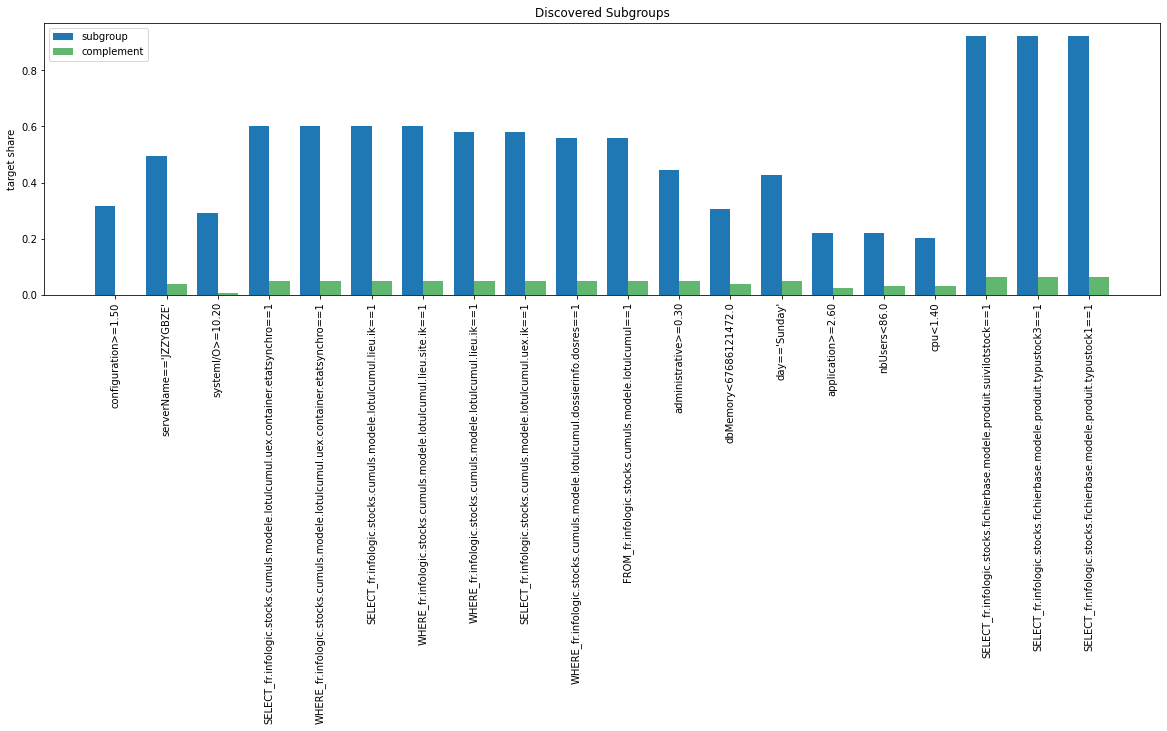

In [12]:
plot_sgbars(res_binomial, 20, ylabel="target share", title="Discovered Subgroups", dynamic_widths=False, _suffix="")

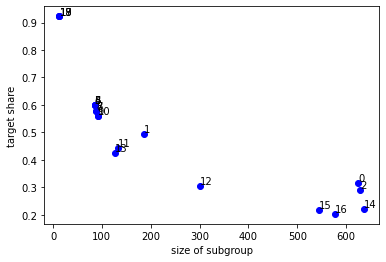

In [13]:
plot_npspace(res_binomial, 20, queries, annotate=True, fixed_limits=False)

In [14]:
d, d_names, sg_names = greedy_jaccard(result_binomial.to_descriptions(),20, queries, 0.8)
for sg in d_names.keys() :
    print(sg)

configuration>=1.50
serverName=='JZZYGBZE'
systemI/O>=10.20
SELECT_fr.infologic.stocks.cumuls.modele.lotulcumul.uex.container.etatsynchro==1
administrative>=0.30
dbMemory<67686121472.0
day=='Sunday'
application>=2.60
nbUsers<86.0
cpu<1.40
SELECT_fr.infologic.stocks.fichierbase.modele.produit.suivilotstock==1


In [15]:
similarity_sgs(result_binomial.to_descriptions(), 20, queries, color=True)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,1.000000,0.175617,0.588086,0.116535,0.116535,0.116535,0.116535,0.115987,0.117739,0.117188,0.117188,0.118168,0.166456,0.124251,0.420519,0.221757,0.196215,0.020833,0.020833,0.020833
1,0.175617,1.000000,0.167622,0.368687,0.368687,0.368687,0.368687,0.363184,0.376884,0.371287,0.371287,0.155797,0.617940,0.019544,0.179340,0.341912,0.263245,0.069892,0.069892,0.069892
2,0.588086,0.167622,1.000000,0.105263,0.105263,0.105263,0.105263,0.104777,0.106481,0.105991,0.105991,0.112409,0.143911,0.080000,0.563659,0.177711,0.154067,0.020668,0.020668,0.020668
3,0.116535,0.368687,0.105263,1.000000,1.000000,1.000000,1.000000,0.965909,0.965909,0.934066,0.934066,0.095477,0.233227,0.004739,0.104135,0.131295,0.120135,0.000000,0.000000,0.000000
4,0.116535,0.368687,0.105263,1.000000,1.000000,1.000000,1.000000,0.965909,0.965909,0.934066,0.934066,0.095477,0.233227,0.004739,0.104135,0.131295,0.120135,0.000000,0.000000,0.000000
5,0.116535,0.368687,0.105263,1.000000,1.000000,1.000000,1.000000,0.965909,0.965909,0.934066,0.934066,0.095477,0.233227,0.004739,0.104135,0.131295,0.120135,0.000000,0.000000,0.000000
6,0.116535,0.368687,0.105263,1.000000,1.000000,1.000000,1.000000,0.965909,0.965909,0.934066,0.934066,0.095477,0.233227,0.004739,0.104135,0.131295,0.120135,0.000000,0.000000,0.000000
7,0.115987,0.363184,0.104777,0.965909,0.965909,0.965909,0.965909,1.000000,0.934066,0.967033,0.967033,0.094059,0.231013,0.004673,0.103659,0.136691,0.123311,0.000000,0.000000,0.000000
8,0.117739,0.376884,0.106481,0.965909,0.965909,0.965909,0.965909,0.934066,1.000000,0.967033,0.967033,0.094059,0.238854,0.004673,0.103659,0.136691,0.123311,0.000000,0.000000,0.000000
9,0.117188,0.371287,0.105991,0.934066,0.934066,0.934066,0.934066,0.967033,0.967033,1.000000,1.000000,0.092683,0.236593,0.004608,0.103187,0.142086,0.126476,0.000000,0.000000,0.000000


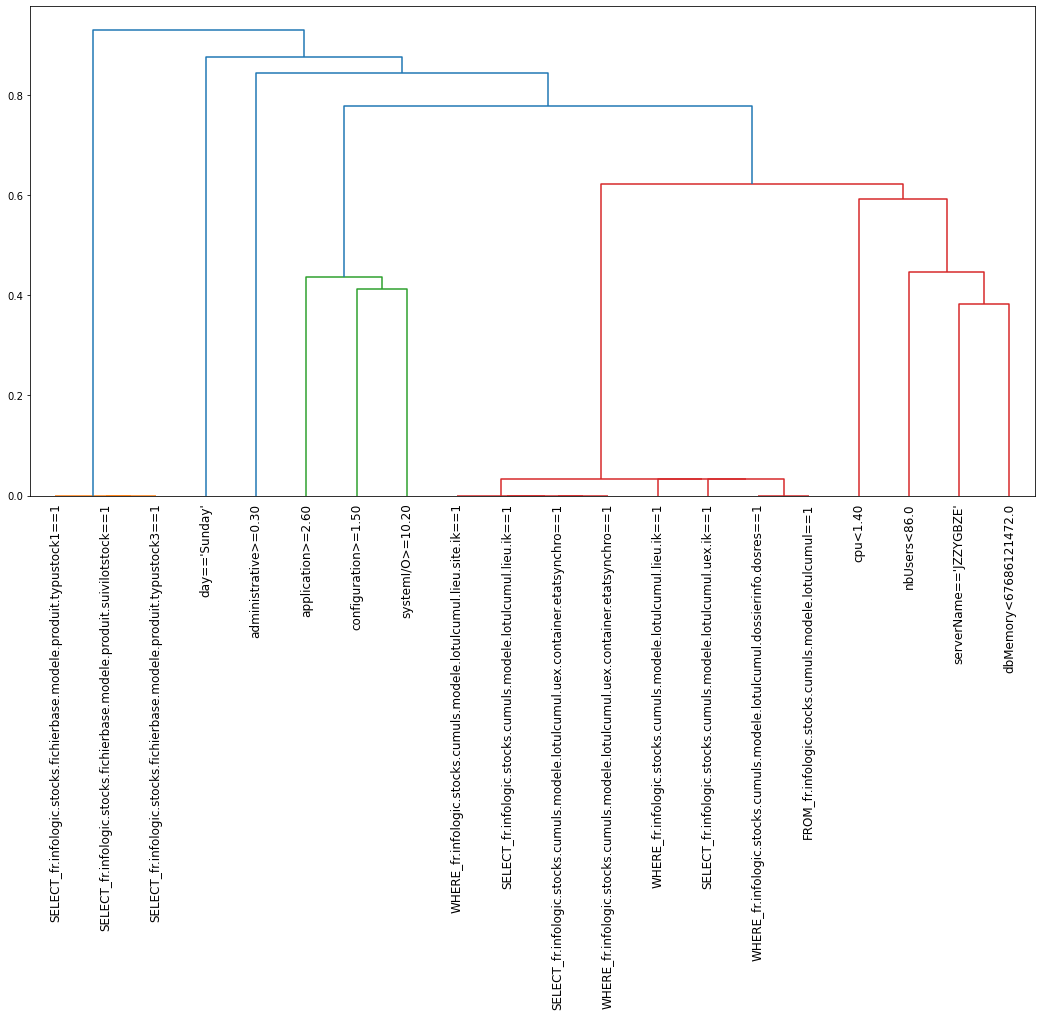

In [16]:
similarity_dendrogram(result_binomial.to_descriptions(), 20, queries)

configuration>=1.50
day=='Sunday'
administrative>=0.30
application>=2.60
configuration>=1.50
systemI/O>=10.20
SELECT_fr.infologic.stocks.cumuls.modele.lotulcumul.uex.ik==1
cpu<1.40
nbUsers<86.0
SELECT_fr.infologic.stocks.fichierbase.modele.produit.typustock3==1
0.5880861850443599


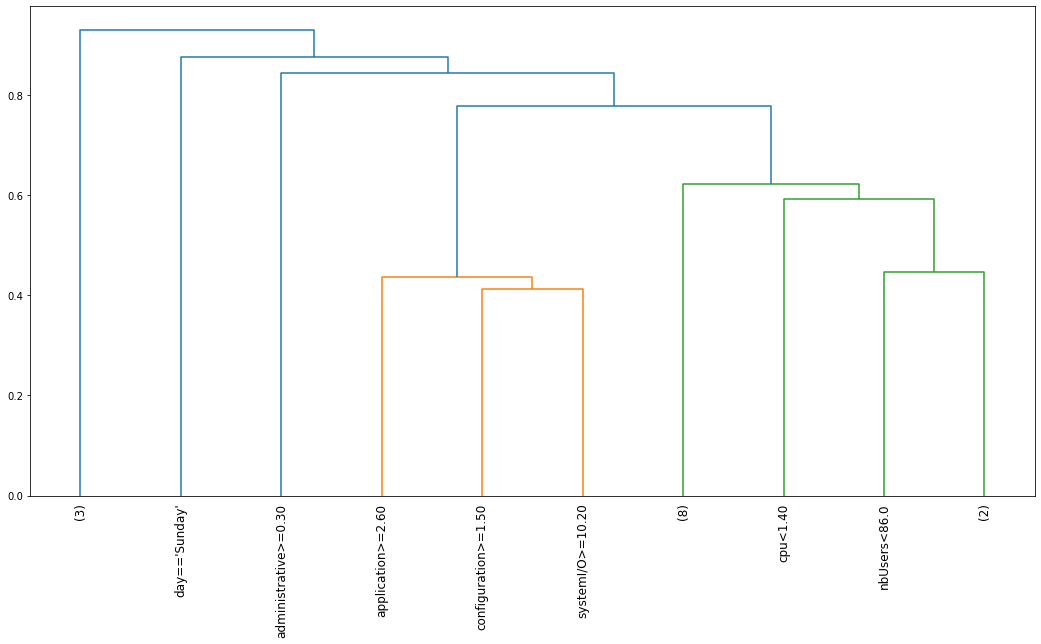

In [17]:
indices = similarity_dendrogram(result_binomial.to_descriptions(), 20, queries,truncated = True, p = 10)

In [18]:
res_raf = res_binomial[res_binomial.index.isin(indices)]

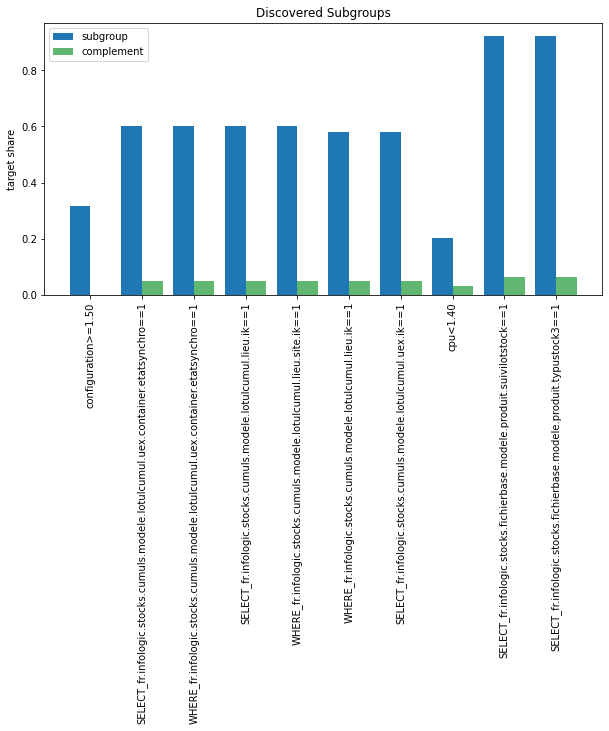

In [19]:
plot_sgbars(res_raf, res_raf.shape[0], ylabel="target share", title="Discovered Subgroups", 
            dynamic_widths=False, _suffix="")

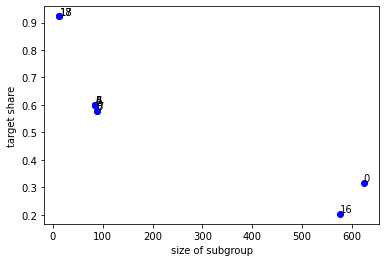

In [20]:
plot_npspace(res_raf, res_raf.shape[0], queries, annotate=True, fixed_limits=False)